1.  Nama : Iskandar Zulkarnaen
2.  Email : silverzulkarnaen@gmail.com
3.  Domisili : Kabupaten Cirebon
4.  No Telp : +6283824503589

In [12]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Mengambil dan Mengekstrak Dataset

In [13]:
#mengambil data
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-29 15:35:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.68MB/s    in 40s     

2021-05-29 15:36:34 (7.76 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [14]:
#ekstraksi data
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir='/tmp/rockpaperscissors/rps-cv-images'

In [15]:
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

Membagi Dataset dan Direktori

In [16]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [17]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [18]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [19]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

Membagi data uji (60%) dan validasi (40%)

In [20]:
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [21]:
import shutil
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

Augmentasi Gambar dan Image Data Generator

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest',)
test_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest',)

In [23]:
training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    batch_size= 32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Penggunaan model Sequential

In [24]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [25]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(
      training_generator,
      steps_per_epoch=23,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2
      )

Epoch 1/20
23/23 - 15s - loss: 1.1696 - accuracy: 0.3940 - val_loss: 1.0098 - val_accuracy: 0.3562
Epoch 2/20
23/23 - 14s - loss: 0.8868 - accuracy: 0.6196 - val_loss: 0.6625 - val_accuracy: 0.8062
Epoch 3/20
23/23 - 14s - loss: 0.5338 - accuracy: 0.8179 - val_loss: 0.3558 - val_accuracy: 0.8875
Epoch 4/20
23/23 - 14s - loss: 0.3558 - accuracy: 0.8791 - val_loss: 0.2501 - val_accuracy: 0.9125
Epoch 5/20
23/23 - 14s - loss: 0.2817 - accuracy: 0.9090 - val_loss: 0.2696 - val_accuracy: 0.8813
Epoch 6/20
23/23 - 14s - loss: 0.2135 - accuracy: 0.9266 - val_loss: 0.1534 - val_accuracy: 0.9563
Epoch 7/20
23/23 - 14s - loss: 0.1471 - accuracy: 0.9524 - val_loss: 0.1643 - val_accuracy: 0.9625
Epoch 8/20
23/23 - 14s - loss: 0.1585 - accuracy: 0.9620 - val_loss: 0.2490 - val_accuracy: 0.9312
Epoch 9/20
23/23 - 14s - loss: 0.1705 - accuracy: 0.9552 - val_loss: 0.0731 - val_accuracy: 0.9875
Epoch 10/20
23/23 - 14s - loss: 0.1479 - accuracy: 0.9511 - val_loss: 0.1542 - val_accuracy: 0.9563
Epoch 11/

Saving 9ZqjWey4XHP94iRr.png to 9ZqjWey4XHP94iRr.png
9ZqjWey4XHP94iRr.png
Gunting


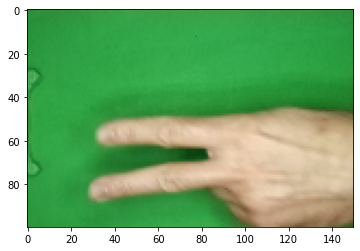

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(100,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      if classes[0][0]==1:
        print('kertas')
      elif classes[0][1]==1:
        print('Batu')
      else:
        print('Gunting')